In [1]:
import quantbt as qbt

data = qbt.data.random_data(seed=100)[0]
print(data)

                  open        high         low       close
date                                                      
2023-01-01   96.500469   97.343832   96.342467   97.185830
2023-01-02   97.185830  100.229609   96.448123   99.491901
2023-01-03   99.491901   99.623296   98.855635   98.987029
2023-01-04   98.987029  101.396866   98.539834  100.949671
2023-01-05  100.949671  102.480134  100.447645  101.978109
...                ...         ...         ...         ...
2025-09-20   58.978186   61.374750   57.945551   60.342115
2025-09-21   60.342115   62.201244   57.007009   58.866138
2025-09-22   58.866138   61.632237   58.752728   61.518828
2025-09-23   61.518828   63.435730   61.455932   63.372835
2025-09-24   63.372835   65.733211   61.438643   63.799019

[998 rows x 4 columns]


In [ ]:
import quantbt.indicators as ind
from quantbt.strategies.S_base import S_base
from quantbt.core.enums import CommissionType, DataType, TradeSizeType


class MyStrategy(S_base):
    def generate_signals(self):
        short_period, long_period = self.params

        self.sma_short = ind.talib_SMA(data.close, period=short_period)
        self.sma_long = ind.talib_SMA(data.close, period=long_period)
        self.long = ind.cross_above(self.sma_short, self.sma_long)
        self.short = ind.cross_below(self.sma_short, self.sma_long)

        return {
            "long_entries": self.long,
            "long_exits": self.short,
            "short_entries": self.short,
            "short_exits": self.long,
        }


strategy_settings = {
    "initial_capital": 100_000,
    "commission": 1.2,
    "commission_type": CommissionType.FIXED,
    "multiplier": 4,
    "data_type": DataType.OHLC,
    "default_trade_size": 1,
    "trade_size_type": TradeSizeType.FIXED,
}

In [ ]:
"""
This is how we actually backtest the strategy.
We only need to set the parameters which will be automatically passed to the st.generate_signals() function
"""
st = MyStrategy(data, **strategy_settings)

params = (5, 23)
st.from_signals(params)

In [2]:
stats = st.get_stats()
print(stats)

            End Value  ROI: (%)    DD  ratio
(5, 23)  100064.21875      0.06  0.06    1.0


In [3]:
trades = st.get_trades()
print(trades)

   IDX  Index  Direction  EntryTime  EntryPrice  ...       PNL  Commission  Active  CloseReason  Extra
0  0.0   39.0        0.0 2023-02-09  100.871552  ...  64.22149         2.4     0.0       SIGNAL   -1.0

[1 rows x 17 columns]


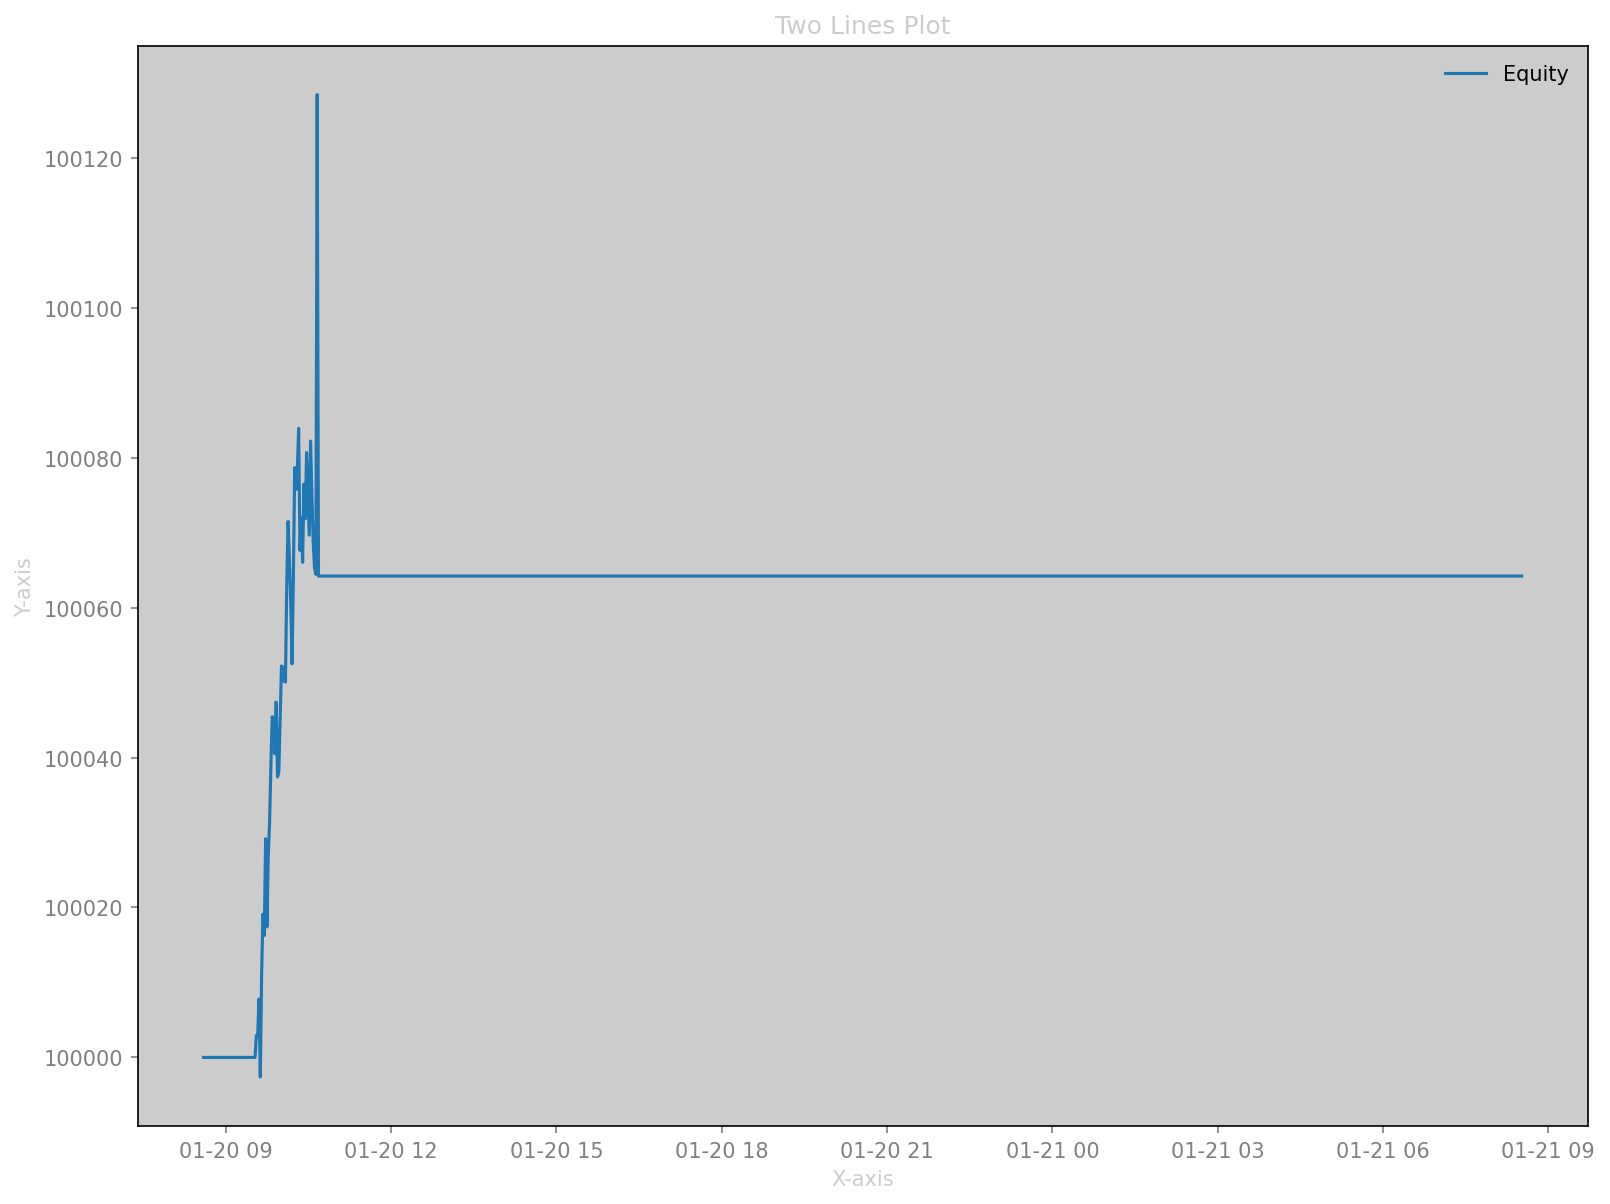

In [4]:
st.plot_equity()

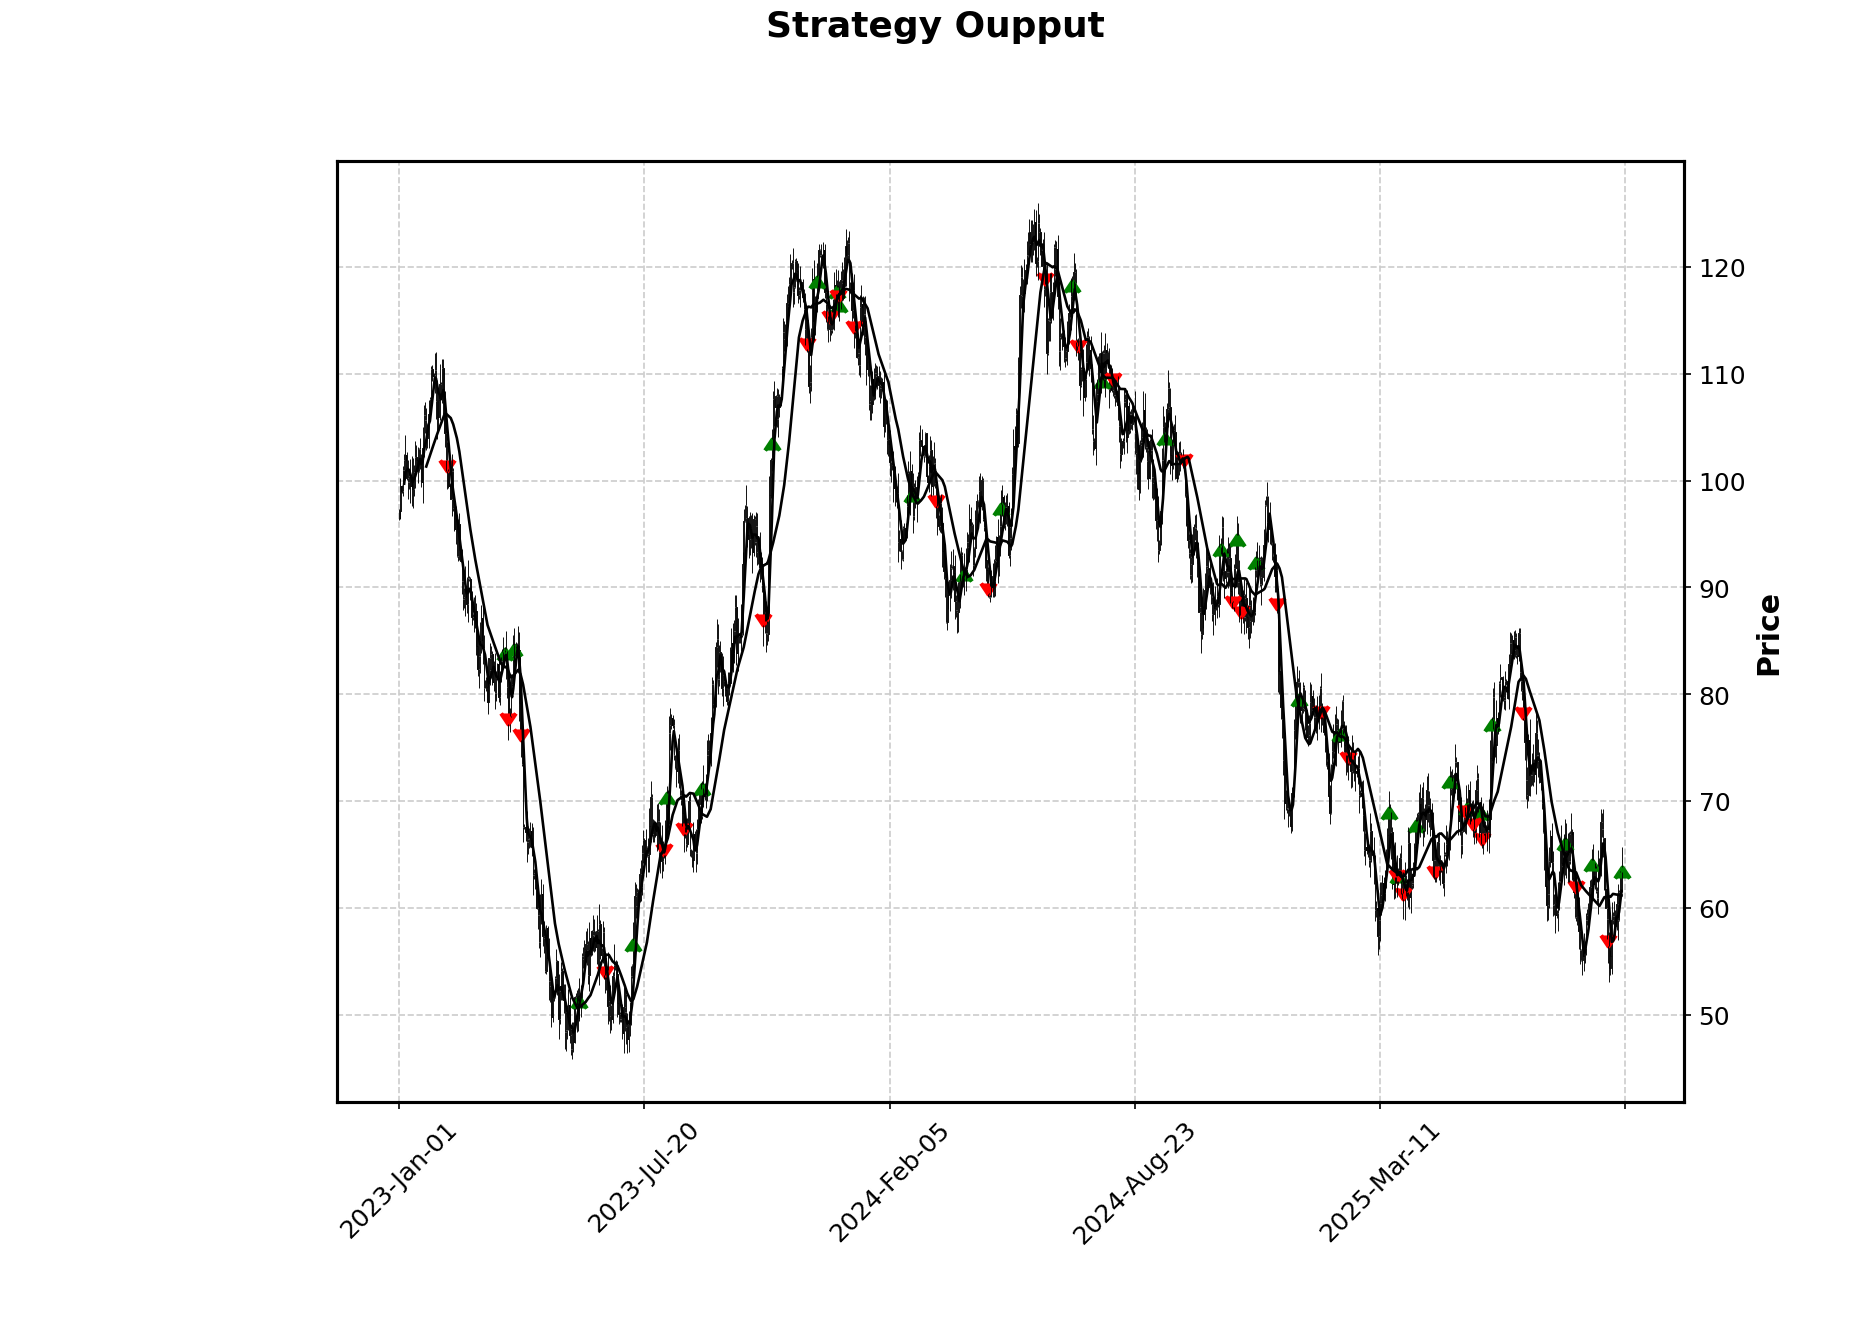

In [5]:
"""
Plotting the equity, adding the 2 MA lines, as well as markers for long and short entry signals
"""

import matplotlib

plotting = qbt.lib.plotting
subplots = [
    plotting.add_line_plot(st.sma_short),
    plotting.add_line_plot(st.sma_long),
    plotting.add_markers(
        st.long, data.close, color="green", marker_type=matplotlib.markers.CARETUP
    ),
    plotting.add_markers(st.short, data.close, color="red"),
]


qbt.lib.plotting.mpf_plot(data, subplots=subplots)

In [6]:
# import os
# from quantbt.lib import optimize
# from quantbt.core.enums import StrategyType
#
# param_combinations = {
#     "ma_short": range(8, 100, 1),
#     "ma_long": range(2, 50, 1),
# }
#
# optimisation = optimize(
#     data,
#     MyStrategy,
#     strategy_settings,
#     strategy_type=StrategyType.FROM_SIGNALS,
#     **param_combinations
#     # ma_short=range(8, 24, 1),
#     # ma_long=range(2, 15, 1),
#     # ma=range(100 + i * 10, 110 + i * 10, 1),
# )
# optimisation
#
# # sym = "Random Data"
# # for i in range(0, 50):
# #     out = f"./optimisation/{sym}-super-{i}.parquet"
# #     if not os.path.exists(out):
# #         optimisation = optimize(
# #             data,
# #             MyStrategy,
# #             # ma_short=range(8, 24, 1),
# #             # ma_long=range(2, 15, 1),
# #             # ma=range(100 + i * 10, 110 + i * 10, 1),
# #         )
# #         print(optimisation)
# #         # optimisation = optimisation.sort_values("ratio", ascending=False)
# #         # optimisation.to_parquet(f"./optimisations/{sym}-super-{i}.parquet")

Total combinations to test:  4416


              End Value  ROI: (%)    DD     ratio
(44, 44)  100000.000000      0.00  0.00       NaN
(44, 45)  100145.765625      0.15  0.15  1.000000
(44, 46)  100145.765625      0.15  0.15  1.000000
(44, 47)  100139.289062      0.14  0.14  1.000000
(44, 48)  100139.289062      0.14  0.14  1.000000
...                 ...       ...   ...       ...
(26, 18)   99946.390625     -0.05  0.11 -0.454545
(26, 19)   99946.367188     -0.05  0.11 -0.454545
(26, 20)   99954.234375     -0.05  0.09 -0.555556
(26, 21)   99954.234375     -0.05  0.09 -0.555556
(26, 22)   99954.234375     -0.05  0.09 -0.555556

[4416 rows x 4 columns]